# WSI LAB 4 - ID3

### Przykładowe wywołanie algorytmu
Poniżej zapisane jest przykładowe wywołanie algorytmu ID3. Na początku dane podzielone są w stosunku 3:1:1 na dane do trenowania drzewa decyzyjnego, dane do walidacji drzew oraz dane do testowania jakości ostatecznie wybranego drzewa decyzyjnego. Następnie wywołany jest algorytm ID3. Wewnątrz funkcji best_depth_id3 tworzone są drzewa decyzyjne ID3 dla każdej możliwej głębokości (hiperparametr), a następnie przy użyciu danych ze zbioru walidacyjnego określa się które z nich najlepiej się sprawuje. Na wyjście standardowe wypisana jest dokładność ostatecznego drzewa decyzyjnego oraz jego predykcje dla 20 losowych punktów danych ze zbioru testowego.

In [21]:
from id3classifier import best_depth_id3, classify_unit, grade_decision_tree
from data_handling import get_breast_cancer_samples, ATTRIBUTES
from copy import copy

train, validate, test = get_breast_cancer_samples(0.6, 0.2, 0.2)
classifier = "irradiat"
attributes = copy(ATTRIBUTES)

decision_tree = best_depth_id3(validate, train, attributes, classifier, 4)
accuracy = grade_decision_tree(decision_tree, test, classifier)
print(f"Current ID3 decision tree has accuracy of {round(accuracy, 5)}")

for i, row in test.sample(20).iterrows():
    classification = classify_unit(row.to_dict(), decision_tree).get_classification()
    print(f"{i:5} -> {classifier}={row[classifier]:4} - classified as {str(classification):5} - {'OK' if classification==row[classifier] else 'WRONG'}")

Current ID3 decision tree has accuracy of 0.75
   29 -> irradiat=no   - classified as no    - OK
   31 -> irradiat=no   - classified as no    - OK
   40 -> irradiat=no   - classified as no    - OK
    0 -> irradiat=yes  - classified as yes   - OK
   22 -> irradiat=no   - classified as no    - OK
    4 -> irradiat=yes  - classified as yes   - OK
   44 -> irradiat=no   - classified as no    - OK
   34 -> irradiat=no   - classified as no    - OK
    8 -> irradiat=yes  - classified as yes   - OK
   53 -> irradiat=no   - classified as yes   - WRONG
   20 -> irradiat=no   - classified as no    - OK
   42 -> irradiat=no   - classified as no    - OK
   24 -> irradiat=no   - classified as no    - OK
    6 -> irradiat=yes  - classified as ['no'] - WRONG
   39 -> irradiat=no   - classified as no    - OK
    1 -> irradiat=yes  - classified as no    - WRONG
    9 -> irradiat=yes  - classified as no    - WRONG
   30 -> irradiat=no   - classified as no    - OK
   26 -> irradiat=no   - classified as n

### Eksperyment - wpływ głębokości drzewa na dokładność klasyfikatora ID3
W tym eksperymencie zostanie zbadany wpływ hiperparametru - maksymalna głębokość drzewa decyzyjnego - na dokładność klasyfikacji. Dane zostaną podzielone w stosunku 3:1 an dane trenujące i testowe. Policzona zostanie mediana i odchylenie standardowe dla 100 prób oszacowania dokładności drzewa decyzyjnego o danej maksymalnej głębokości.

Calculating samples for depth 1
Calculating samples for depth 2
Calculating samples for depth 3
Calculating samples for depth 4
Calculating samples for depth 5
Calculating samples for depth 6
Calculating samples for depth 7
Calculating samples for depth 8


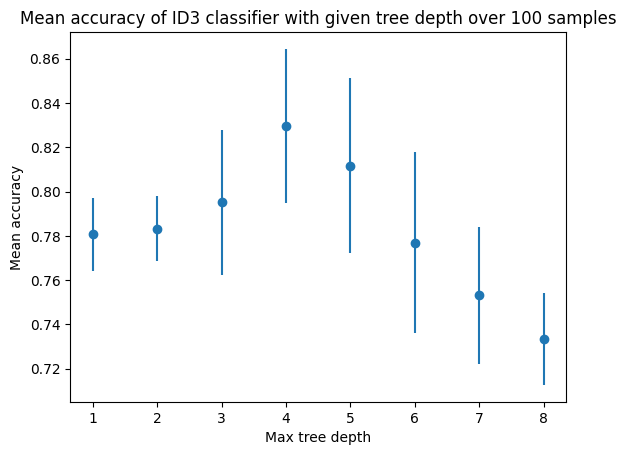

In [2]:
from plot_utils import plot_tree_depth_over_accuracy

depths = [
    1, 2, 3, 4, 5, 6, 7, 8
]
samples = 100

plot_tree_depth_over_accuracy(samples, depths)

#### Wnioski

Gdy maksymalna głębokość jest zbyt mała, klasyfikator nie jest w stanie nauczyć się właściwych decyzji potrzebnych do dokładnego oszacowania klasy, stąd dokładność spada dla głębokości 4 -> 1. Natomiast z drugiej strony, jeśli głębokość jest zbyt duża następuje przeuczenie, które sprawia że drzewo decyzyjne słabo generalizuje poza swoim zbiorem danych trenujących, stąd dokładność maleje dla głębokości 4 -> 8. Optymalną wartością maksymalnej głębokości jest 4. Drzewa decyzyjne tworzone z tą wartością hiperparametru mają najlepszą medianę dokładności.
